In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from pandas.plotting import scatter_matrix
from sklearn.tree import export_graphviz
import seaborn as sns
from scapy.all import rdpcap
from features.utils import write_to_csv, traffic_stats_summary

%matplotlib inline

### Load and Read Dataset

In [2]:
normal = "./data/dataset/normal.pcap"
ddos = "./data/dataset/ddos.pcap"

csv_normal = "./data/csv/normal.csv"
csv_ddos = "./data/csv/ddos.csv"

# Create the output directory if it doesn't exist
os.makedirs("./data/csv", exist_ok=True)

# Read normal traffic pcap file
packets_normal = rdpcap(normal)
df_ddos = write_to_csv(packets_normal, csv_normal)

# Read DDoS traffic pcap file
packets_ddos = rdpcap(ddos)
df_normal = write_to_csv(packets_ddos, csv_ddos)

In [3]:
df_ddos.head()

,frame_number,src_addr,dst_addr,src_port,dst_port,tcp_flags,protocol
0,0,192.168.50.6,172.217.10.98,54799,443,PA,6
1,1,192.168.50.6,172.217.10.98,54799,443,PA,6
2,2,192.168.50.6,172.217.7.2,54800,443,PA,6
3,3,192.168.50.6,172.217.7.2,54800,443,PA,6
4,4,192.168.50.6,172.217.10.98,54801,443,PA,6


In [4]:
df_normal.head()

,frame_number,src_addr,dst_addr,src_port,dst_port,tcp_flags,protocol
0,0,172.16.0.5,192.168.50.1,52003,80,S,6
1,1,172.16.0.5,192.168.50.1,52003,80,S,6
2,2,192.168.50.1,172.16.0.5,80,52003,SA,6
3,3,192.168.50.1,172.16.0.5,80,52003,SA,6
4,4,172.16.0.5,192.168.50.1,52003,80,A,6


In [5]:
df_normal.shape

(3104, 7)

In [6]:
df_ddos.shape

(27725, 7)

## Data Pre-processing

In [7]:
# Create the output directory if they don't exist
os.makedirs("./data/batches", exist_ok=True)

# Process normal .csv files
df_normal = traffic_stats_summary('./data/csv/normal.csv', 'normal')
df_normal.to_csv('./data/batches/normal.csv', index = False)

# Process ddos .csv files
df_ddos = traffic_stats_summary('./data/csv/ddos.csv', 'ddos')
df_ddos.to_csv('./data/batches/ddos.csv', index = False)

In [8]:
df_ddos.head()

,ip.proto,ip.src.len.mean,ip.src.len.median,ip.src.len.var,ip.src.len.std,ip.src.len.entropy,ip.src.len.cv,ip.src.len.cvq,ip.src.len.unique_ratio,ip.dst.len.mean,...,dport.unique_ratio,tcp.flags.mean,tcp.flags.median,tcp.flags.var,tcp.flags.std,tcp.flags.entropy,tcp.flags.cv,tcp.flags.cvq,tcp.flags.unique_ratio,status
1,6.0,8.00,8.0,1.020408,1.010153,0,0.126269,0,0.04,8.00,...,0.12,105.48,109.0,1475.928163,38.417810,0,0.364219,0,0.10,ddos
2,6.0,7.80,7.0,0.979592,0.989743,0,0.126890,0,0.04,8.20,...,0.14,111.62,135.0,1412.077143,37.577615,0,0.336657,0,0.10,ddos
3,6.0,7.80,7.0,0.979592,0.989743,0,0.126890,0,0.04,8.20,...,0.12,113.66,135.0,1375.494286,37.087657,0,0.326304,0,0.08,ddos
4,6.0,7.72,7.0,0.940408,0.969746,0,0.125615,0,0.04,8.28,...,0.14,102.88,83.0,1400.148571,37.418559,0,0.363711,0,0.10,ddos
5,6.0,7.84,7.0,0.994286,0.997139,0,0.127186,0,0.04,8.16,...,0.14,104.58,83.0,1431.391429,37.833734,0,0.361768,0,0.10,ddos


In [9]:
df_normal.head()

,ip.proto,ip.src.len.mean,ip.src.len.median,ip.src.len.var,ip.src.len.std,ip.src.len.entropy,ip.src.len.cv,ip.src.len.cvq,ip.src.len.unique_ratio,ip.dst.len.mean,...,dport.unique_ratio,tcp.flags.mean,tcp.flags.median,tcp.flags.var,tcp.flags.std,tcp.flags.entropy,tcp.flags.cv,tcp.flags.cvq,tcp.flags.unique_ratio,status
1,7.10,9.00,9.0,2.081633,1.442786,0,0.160310,0,0.08,9.48,...,0.24,97.84,83.0,2170.504490,46.588673,0,0.476172,0,0.16,normal
2,7.76,10.08,9.0,4.564898,2.136562,0,0.211961,0,0.06,9.48,...,0.18,91.74,83.0,2841.992245,53.310339,0,0.581102,0,0.12,normal
3,7.10,9.06,9.0,2.669796,1.633951,0,0.180348,0,0.08,9.52,...,0.24,90.82,65.0,2338.762857,48.360757,0,0.532490,0,0.10,normal
4,7.10,9.12,9.0,1.944490,1.394450,0,0.152900,0,0.06,9.18,...,0.20,102.54,145.0,2552.824898,50.525488,0,0.492739,0,0.10,normal
5,12.16,7.60,9.0,5.142857,2.267787,0,0.298393,0,0.04,7.60,...,0.28,51.04,0.0,4050.610612,63.644408,0,1.246952,0,0.08,normal


## Exploratory Data Analysis

In [10]:
df = pd.concat([df_normal, df_ddos], ignore_index=True)
df = df.fillna(0)
df['status'] = df['status'].map({'normal': 0, 'ddos': 1})
df.head()

,ip.proto,ip.src.len.mean,ip.src.len.median,ip.src.len.var,ip.src.len.std,ip.src.len.entropy,ip.src.len.cv,ip.src.len.cvq,ip.src.len.unique_ratio,ip.dst.len.mean,...,dport.unique_ratio,tcp.flags.mean,tcp.flags.median,tcp.flags.var,tcp.flags.std,tcp.flags.entropy,tcp.flags.cv,tcp.flags.cvq,tcp.flags.unique_ratio,status
0,7.10,9.00,9.0,2.081633,1.442786,0,0.160310,0,0.08,9.48,...,0.24,97.84,83.0,2170.504490,46.588673,0,0.476172,0,0.16,0
1,7.76,10.08,9.0,4.564898,2.136562,0,0.211961,0,0.06,9.48,...,0.18,91.74,83.0,2841.992245,53.310339,0,0.581102,0,0.12,0
2,7.10,9.06,9.0,2.669796,1.633951,0,0.180348,0,0.08,9.52,...,0.24,90.82,65.0,2338.762857,48.360757,0,0.532490,0,0.10,0
3,7.10,9.12,9.0,1.944490,1.394450,0,0.152900,0,0.06,9.18,...,0.20,102.54,145.0,2552.824898,50.525488,0,0.492739,0,0.10,0
4,12.16,7.60,9.0,5.142857,2.267787,0,0.298393,0,0.04,7.60,...,0.28,51.04,0.0,4050.610612,63.644408,0,1.246952,0,0.08,0


In [11]:
df.describe()

,ip.proto,ip.src.len.mean,ip.src.len.median,ip.src.len.var,ip.src.len.std,ip.src.len.entropy,ip.src.len.cv,ip.src.len.cvq,ip.src.len.unique_ratio,ip.dst.len.mean,...,dport.unique_ratio,tcp.flags.mean,tcp.flags.median,tcp.flags.var,tcp.flags.std,tcp.flags.entropy,tcp.flags.cv,tcp.flags.cvq,tcp.flags.unique_ratio,status
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.0,308.000000,308.0,308.000000,308.000000,...,308.000000,308.000000,308.000000,308.000000,308.000000,308.0,308.000000,308.0,308.000000,308.000000
mean,7.420714,9.043247,9.074675,2.320673,1.407125,0.0,0.157912,0.0,0.070000,9.020714,...,0.213961,89.398766,88.668831,2161.586174,44.968986,0.0,0.547807,0.0,0.086234,0.100649
std,1.679533,0.653609,0.784173,1.783644,0.584621,0.0,0.071403,0.0,0.019134,0.585355,...,0.085090,19.880073,37.344148,952.173608,11.824995,0.0,0.302785,0.0,0.026081,0.301353
min,6.000000,6.900000,7.000000,0.000000,0.000000,0.0,0.000000,0.0,0.020000,6.500000,...,0.040000,6.600000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.020000,0.000000
25%,6.000000,8.750000,9.000000,0.977143,0.988503,0.0,0.108086,0.0,0.060000,8.680000,...,0.140000,75.960000,65.000000,1475.144184,38.407602,0.0,0.377291,0.0,0.060000,0.000000
50%,6.880000,9.180000,9.000000,1.891837,1.375440,0.0,0.145245,0.0,0.080000,9.120000,...,0.210000,92.240000,65.000000,2001.805102,44.741511,0.0,0.491001,0.0,0.090000,0.000000
75%,8.200000,9.485000,9.000000,3.393469,1.842135,0.0,0.201143,0.0,0.080000,9.440000,...,0.260000,105.030000,135.000000,2881.642449,53.680925,0.0,0.644309,0.0,0.100000,0.000000
max,16.120000,10.520000,11.000000,9.312653,3.051664,0.0,0.374313,0.0,0.120000,10.200000,...,0.500000,129.340000,145.000000,5065.280000,71.170781,0.0,3.668304,0.0,0.160000,1.000000


## Bivariate Data Analysis

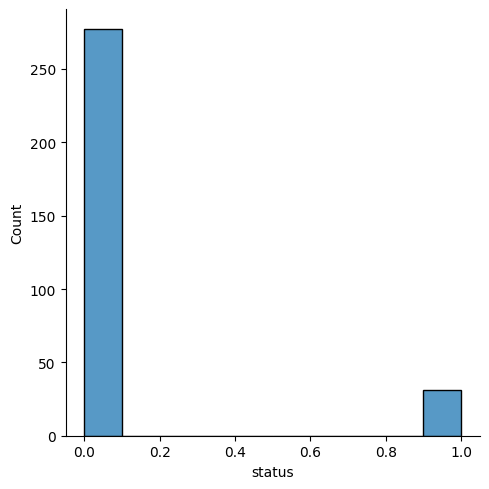

In [12]:
# plot the distribution of the status
sns.displot(df['status'],kde=False)

<Axes: >

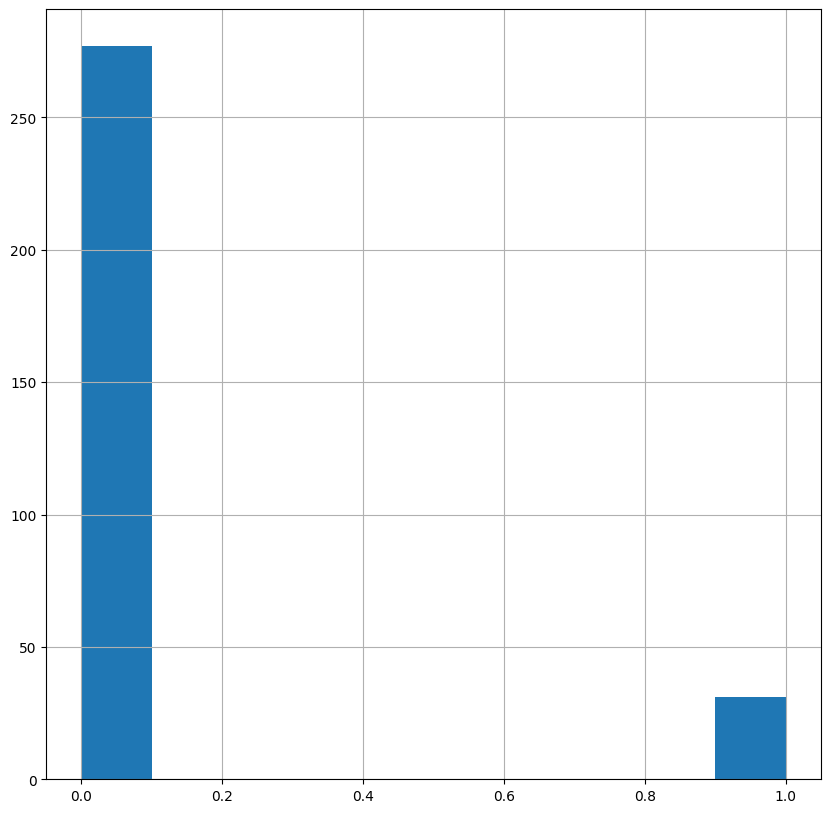

In [13]:
df['status'].hist(figsize=(10,10))

## Multivariate Data Analysis

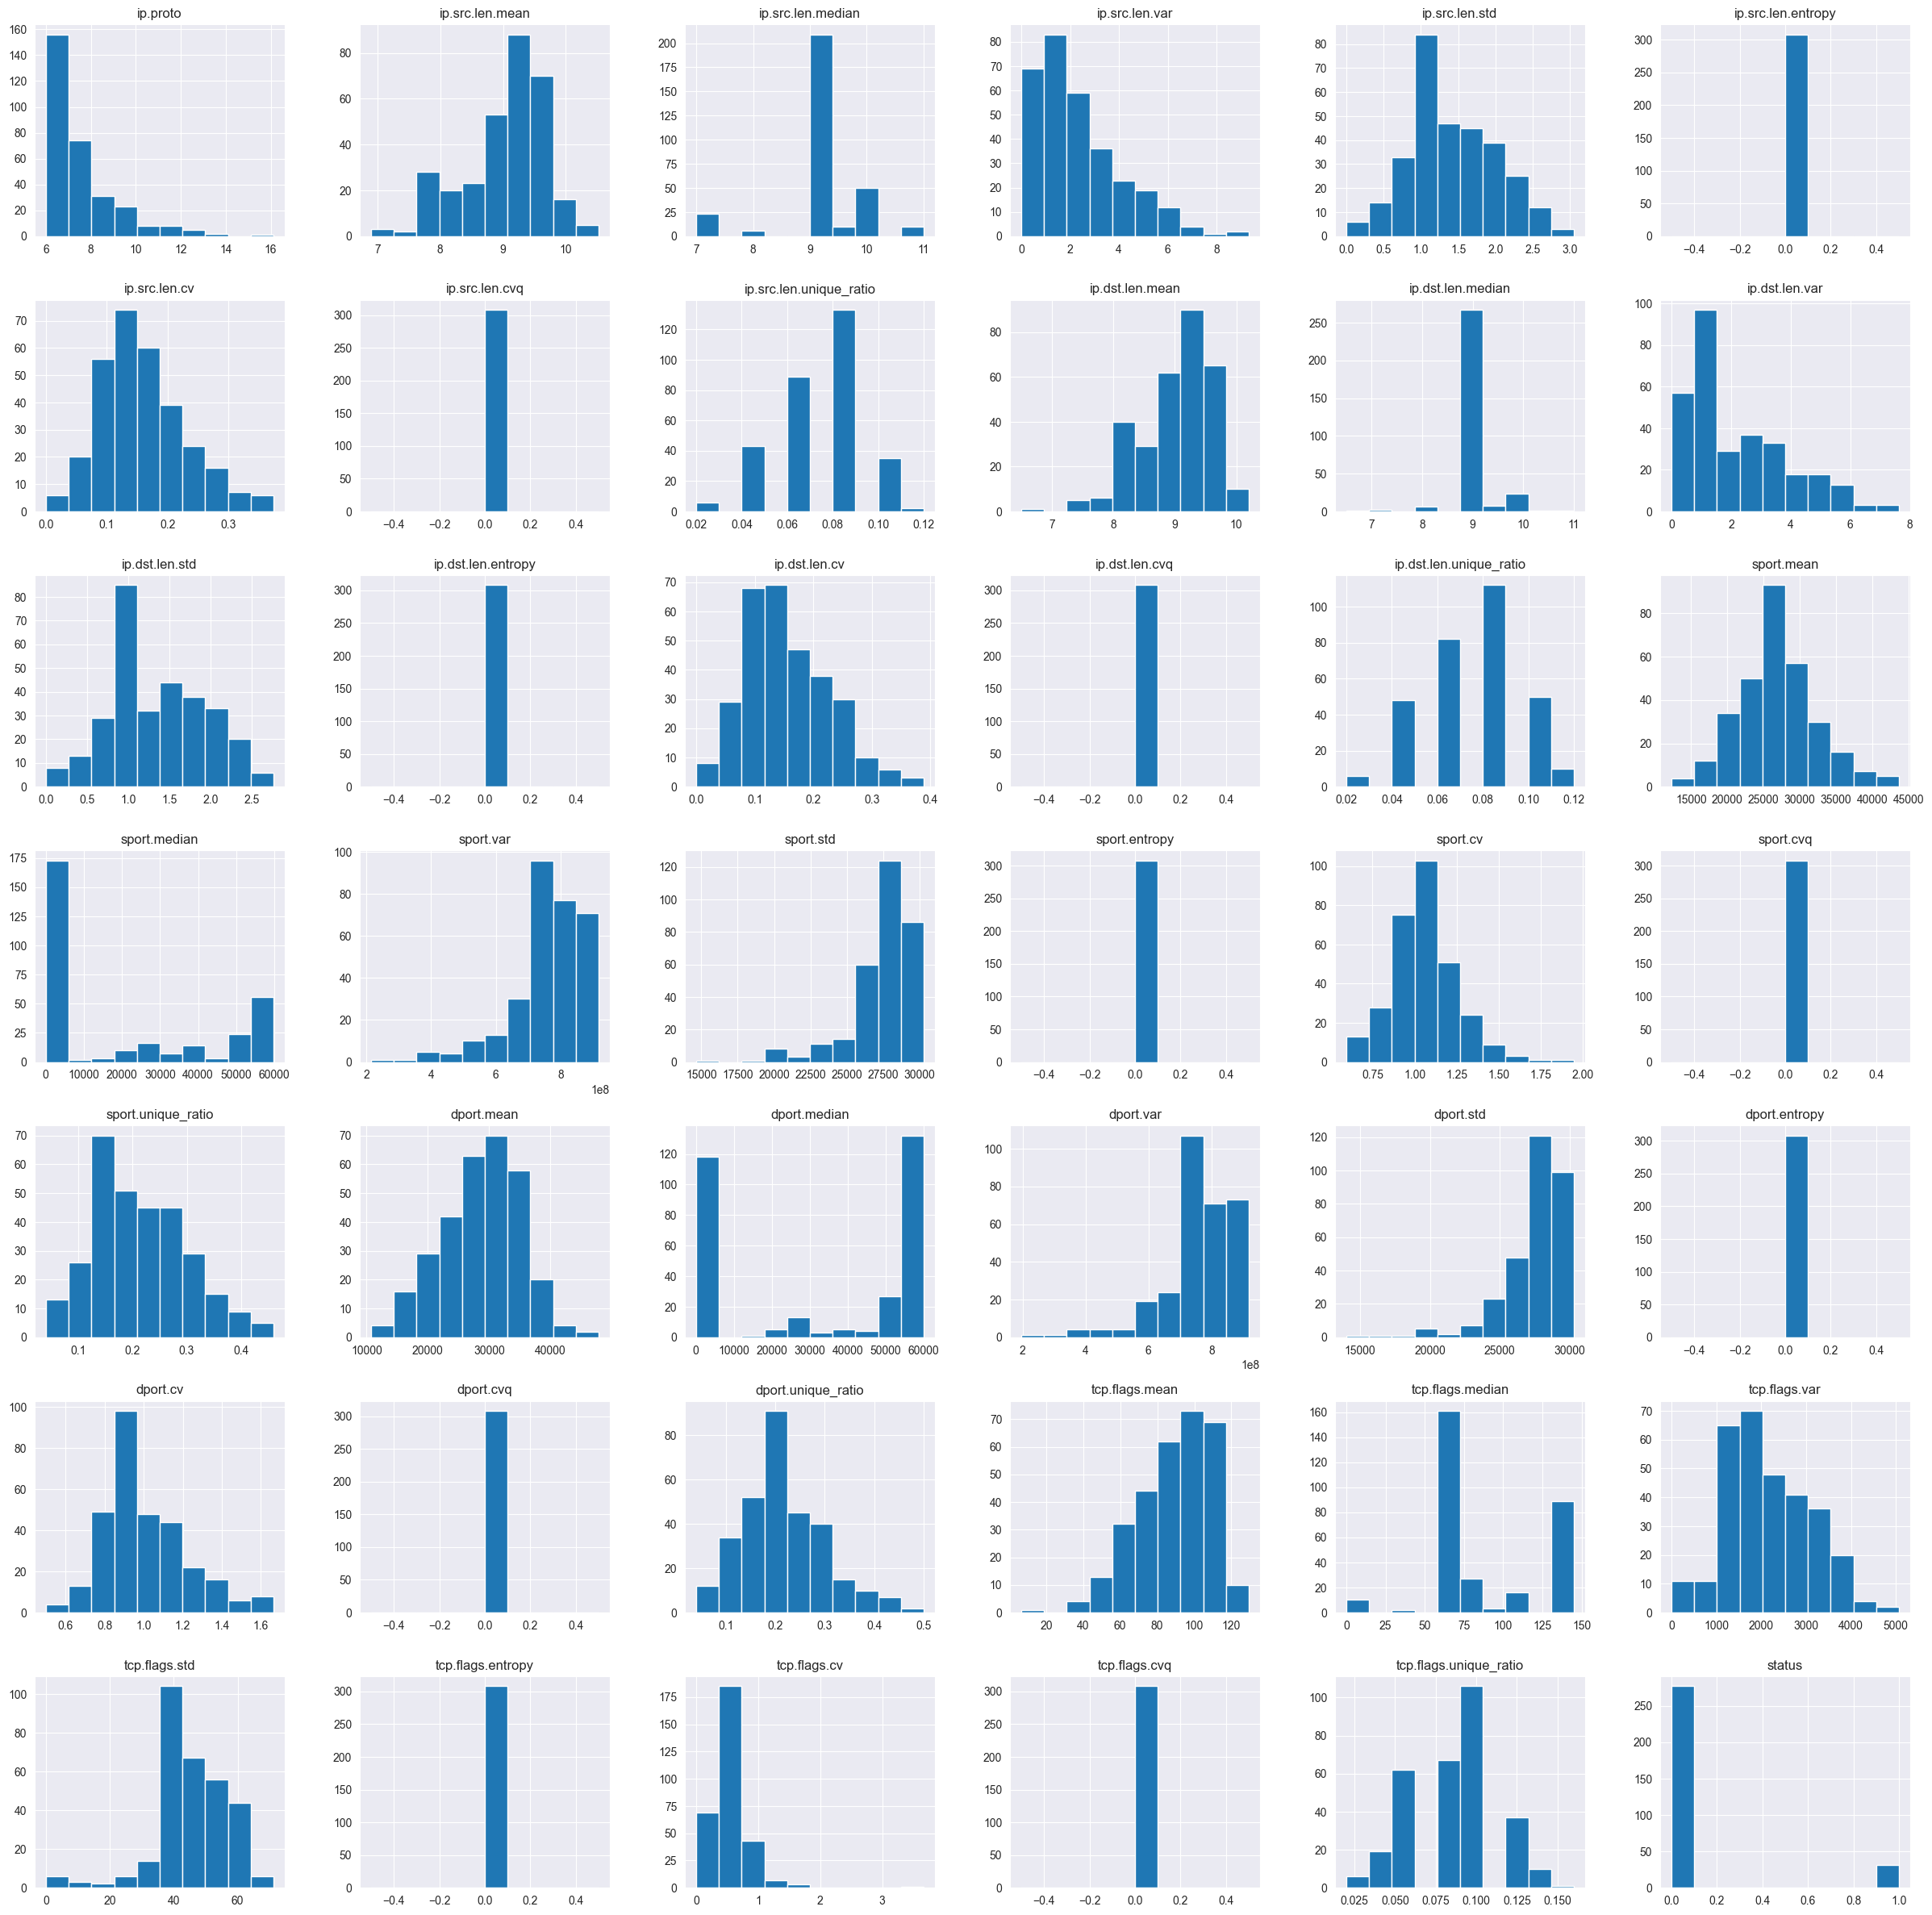

In [14]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

<Axes: >

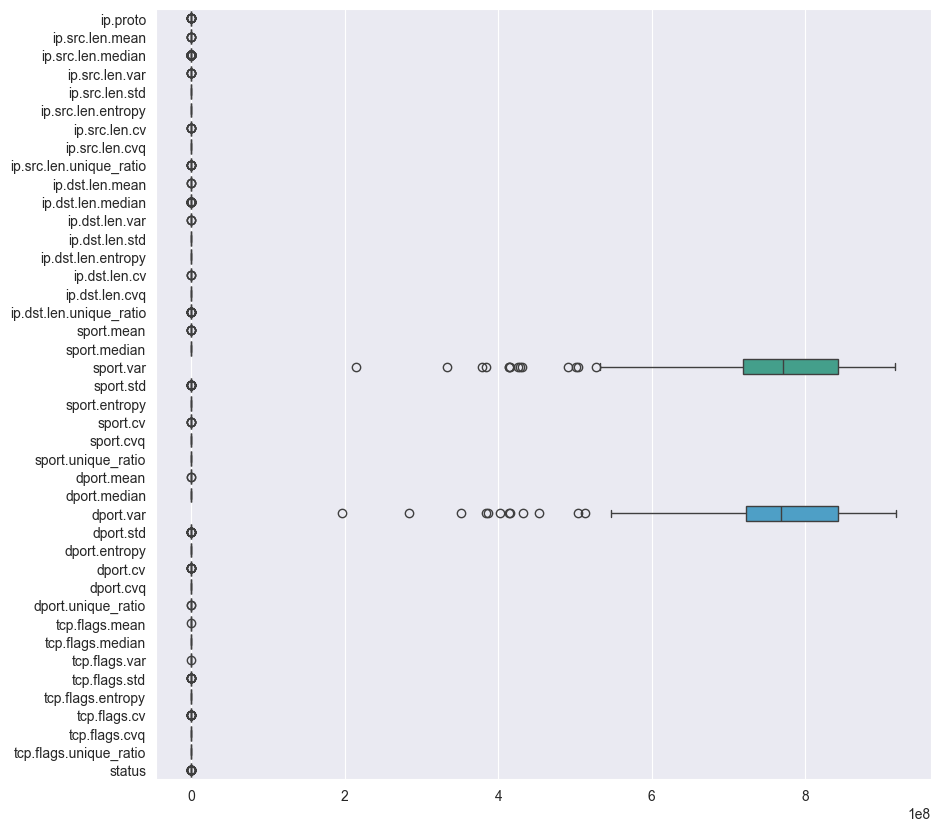

In [15]:
# Boxplots are useful for visually summarizing the distribution of a dataset, identifying outliers
# and comparing the distribution of multiple datasets. They provide a compact way
# to display key statistical information about the data.
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

## Feature Selection

In [16]:
df.corr()

,ip.proto,ip.src.len.mean,ip.src.len.median,ip.src.len.var,ip.src.len.std,ip.src.len.entropy,ip.src.len.cv,ip.src.len.cvq,ip.src.len.unique_ratio,ip.dst.len.mean,...,dport.unique_ratio,tcp.flags.mean,tcp.flags.median,tcp.flags.var,tcp.flags.std,tcp.flags.entropy,tcp.flags.cv,tcp.flags.cvq,tcp.flags.unique_ratio,status
ip.proto,1.000000,-0.458875,0.038072,0.848373,0.809850,NaN,0.866885,NaN,0.145165,-0.542342,...,0.320176,-0.755008,-0.549031,0.696940,0.605967,NaN,0.916321,NaN,0.153141,-0.283443
ip.src.len.mean,-0.458875,1.000000,0.698474,-0.329682,-0.293253,NaN,-0.449570,NaN,0.334526,0.852165,...,0.005344,0.313510,0.190871,-0.227552,-0.196173,NaN,-0.451441,NaN,-0.161469,-0.591719
ip.src.len.median,0.038072,0.698474,1.000000,0.069307,0.065169,NaN,-0.031896,NaN,0.275702,0.525860,...,0.067802,-0.116867,-0.132964,0.034030,0.005259,NaN,0.014346,NaN,-0.225102,-0.748675
ip.src.len.var,0.848373,-0.329682,0.069307,1.000000,0.969054,NaN,0.967430,NaN,0.242483,-0.350136,...,0.344951,-0.601277,-0.442587,0.727721,0.649551,NaN,0.730910,NaN,0.243106,-0.248248
ip.src.len.std,0.809850,-0.293253,0.065169,0.969054,1.000000,NaN,0.981680,NaN,0.343569,-0.311290,...,0.363359,-0.552765,-0.407914,0.745420,0.696361,NaN,0.705365,NaN,0.326647,-0.233602
ip.src.len.entropy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.src.len.cv,0.866885,-0.449570,-0.031896,0.967430,0.981680,NaN,1.000000,NaN,0.257578,-0.444656,...,0.356351,-0.597134,-0.438741,0.731028,0.676270,NaN,0.775195,NaN,0.312520,-0.146458
ip.src.len.cvq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.src.len.unique_ratio,0.145165,0.334526,0.275702,0.242483,0.343569,NaN,0.257578,NaN,1.000000,0.356839,...,0.524569,-0.087749,-0.161372,0.296758,0.336821,NaN,0.121984,NaN,0.237586,-0.525357
ip.dst.len.mean,-0.542342,0.852165,0.525860,-0.350136,-0.311290,NaN,-0.444656,NaN,0.356839,1.000000,...,0.023081,0.407523,0.276005,-0.266061,-0.217054,NaN,-0.531895,NaN,-0.110557,-0.520773


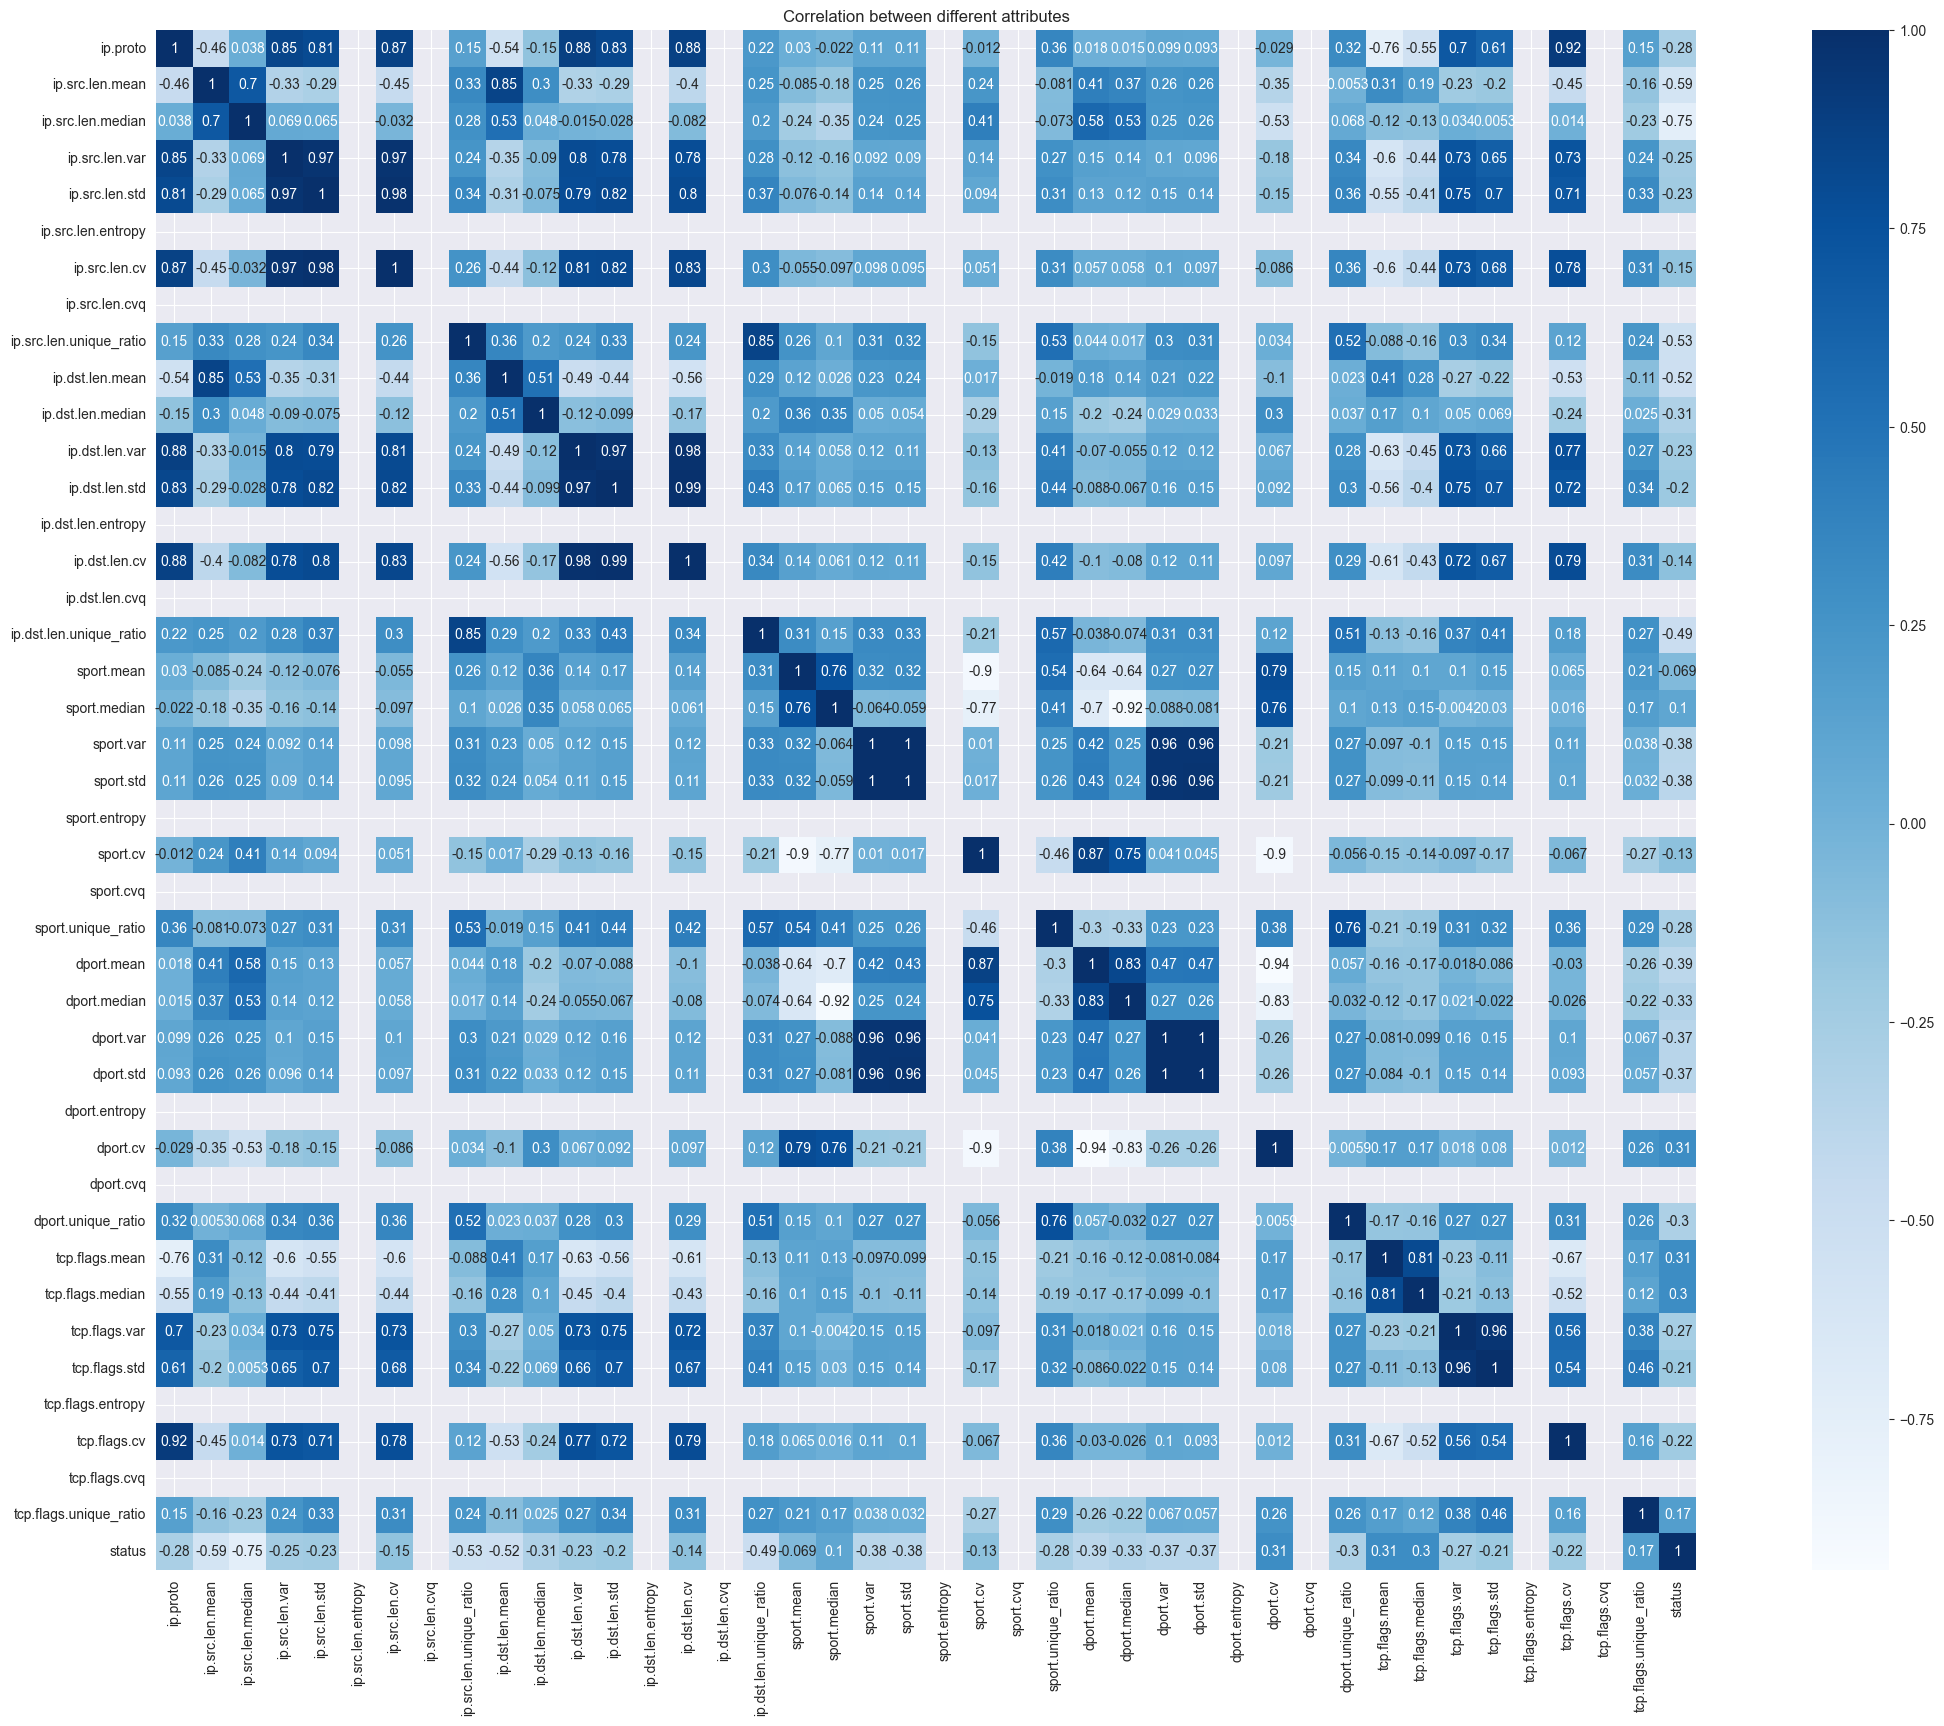

In [17]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [18]:
# Correlation with output variable
cor_target = abs(cor["status"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

ip.proto                   0.283443
ip.src.len.mean            0.591719
ip.src.len.median          0.748675
ip.src.len.var             0.248248
ip.src.len.std             0.233602
ip.src.len.cv              0.146458
ip.src.len.unique_ratio    0.525357
ip.dst.len.mean            0.520773
ip.dst.len.median          0.314210
ip.dst.len.var             0.232711
ip.dst.len.std             0.202418
ip.dst.len.cv              0.135737
ip.dst.len.unique_ratio    0.487923
sport.mean                 0.069459
sport.median               0.102820
sport.var                  0.379160
sport.std                  0.381737
sport.cv                   0.129533
sport.unique_ratio         0.281927
dport.mean                 0.390982
dport.median               0.332378
dport.var                  0.368308
dport.std                  0.370754
dport.cv                   0.306845
dport.unique_ratio         0.296335
tcp.flags.mean             0.310099
tcp.flags.median           0.302834
tcp.flags.var              0

## Train and Test Model

In [19]:
# Split the data into predictor variables and target variable, following by breaking them into train and test sets. 
Y = df['status'].values
X = df[list(relevant_features.index)].drop('status', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [20]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

## Random Forest Classifier

Now we can move on to a more powerful model, the random forest. This takes the idea of a single decision tree, and creates an ensemble model out of hundreds or thousands of trees to reduce the variance. Each tree is trained on a random set of the observations, and for each split of a node, only a subset of the features are used for making a split. When making predictions, the random forest averages the predictions for each of the individual decision trees for each data point in order to arrive at a final classification.

In [21]:
model = RandomForestClassifier(n_estimators=10, random_state=10, max_features = 'sqrt', n_jobs=-1, verbose = 1)
model.fit(X_train, Y_train)

n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
  n_nodes.append(ind_tree.tree_.node_count)
  max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


Average number of nodes 8
Average maximum depth 3


#### Confusion Matrix

In [22]:
# Make probability predictions
train_probs = model.predict_proba(X_train)[:, 1]
probs = model.predict_proba(X_test)[:, 1]

train_predictions = model.predict(X_train)
predictions = model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


Confusion matrix, without normalization
[[81  0]
 [ 0 12]]


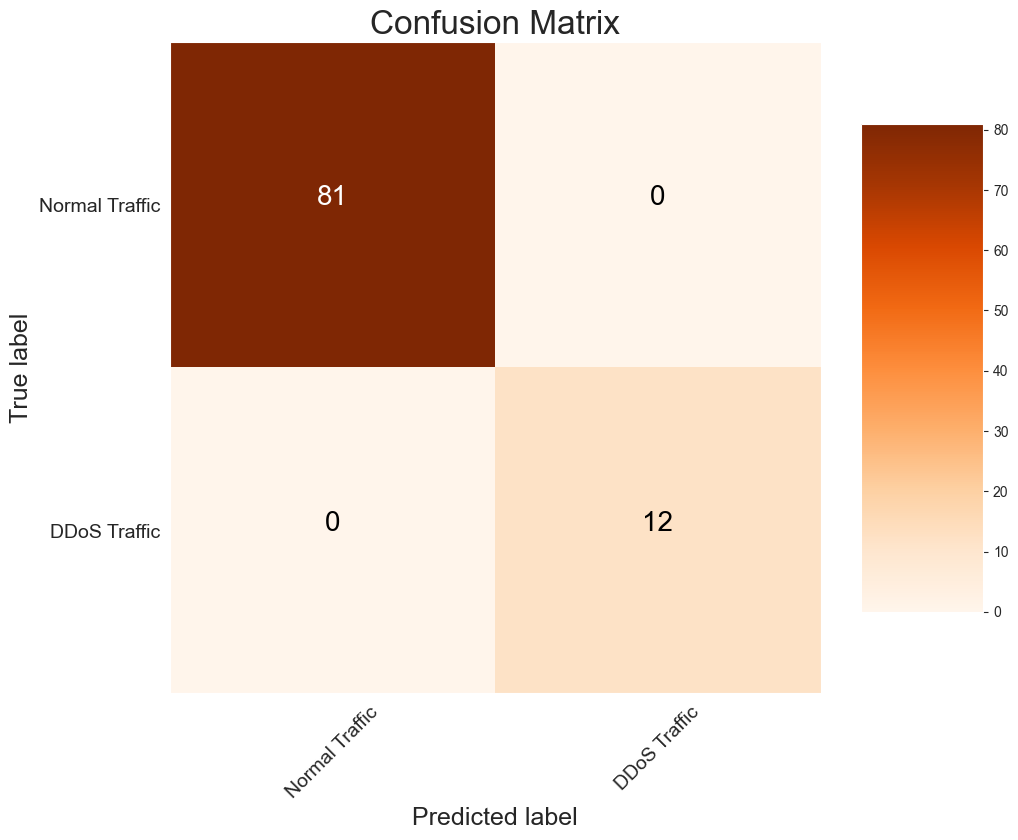

In [23]:
cm = confusion_matrix(Y_test, predictions)
plot_confusion_matrix(cm, classes = ['Normal Traffic', 'DDoS Traffic'], title = 'Confusion Matrix')

#### Feature Importance

In [24]:
importances = pd.DataFrame({
  	'feature': list(df[list(relevant_features.index)].drop('status', axis=1).columns),
  	'importance': model.feature_importances_
}).sort_values('importance', ascending = False)
importances.head()

,feature,importance
2,ip.src.len.median,0.266929
1,ip.src.len.mean,0.183919
6,ip.src.len.unique_ratio,0.155312
12,ip.dst.len.unique_ratio,0.054957
11,ip.dst.len.cv,0.051245


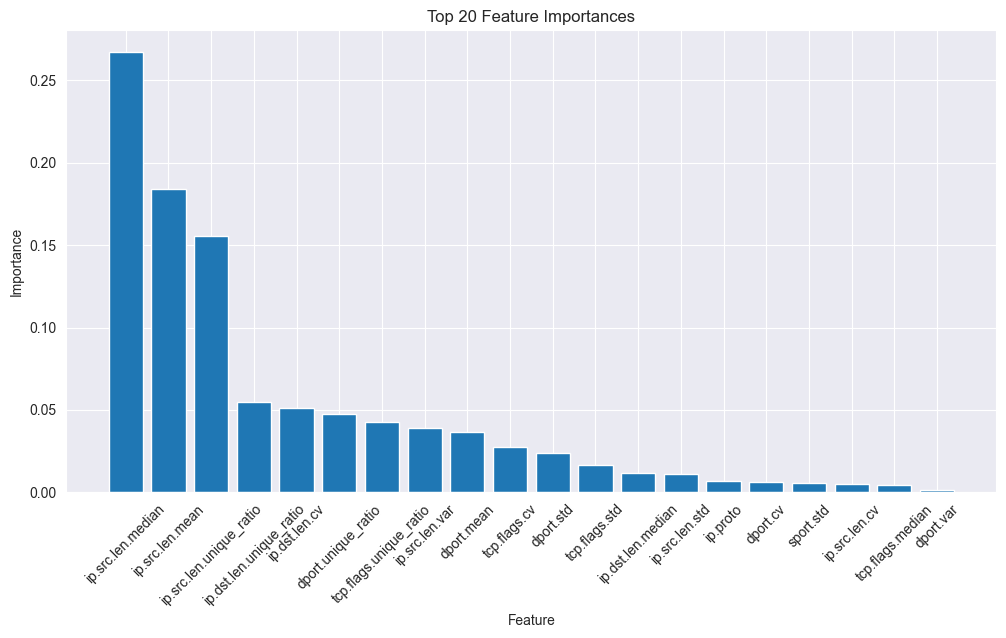

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(importances['feature'][:20], importances['importance'][:20])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importances')
plt.xticks(rotation=45)
plt.show()

#### Visualize The Forest

In [26]:
estimator = model.estimators_[1]
export_graphviz(estimator, 'forest.dot', rounded = True, feature_names=list(df[list(relevant_features.index)].drop('status', axis=1).columns), max_depth = 8, class_names = ['DDoS Traffic', 'Normal Traffic'], filled = True)

from PIL import Image
call(['dot', '-Tpng', 'forest.dot', '-o', 'forest.png', '-Gdpi=200'])
Image.open('tree1.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
estimators = model.estimators_
from sklearn.tree import export_graphviz
from subprocess import call

for i, estimator in enumerate(estimators):
    export_graphviz(estimator, f'forest_tree_{i}.dot', 
                    feature_names=list(df[list(relevant_features.index)].drop('status', axis=1).columns), 
                    class_names=['DDoS Traffic', 'Normal Traffic'], 
                    filled=True, rounded=True, max_depth=3)


In [ ]:
for i, _ in enumerate(estimators):
    call(['dot', '-Tpng', f'forest_tree_{i}.dot', '-o', f'forest_tree_{i}.png', '-Gdpi=200'])


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
from PIL import Image

for i, _ in enumerate(estimators):
    Image.open(f'forest_tree_{i}.png').show()

In [ ]:
print(f'Model Accuracy: {estimator.score(X_test, Y_test)}')

Model Accuracy: 0.989247311827957


In [ ]:
# Dump the trained model to a file
from joblib import dump
dump(model, 'model.sav')

['model.sav']